In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
carpeta_actual = os.getcwd()

directorio = os.path.dirname(carpeta_actual)
ruta_archivo = os.path.join(directorio, 'data_acquisition', 'bank-additional-full.csv')

df=pd.read_csv(ruta_archivo, sep=';')
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Revisión de Nan

In [58]:
### No existe casos Nan
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 1. Datos del cliente del banco

#### 1.1 Edad - Consideraciones:

- Menores de 18 años

    <p> Como el objetivo es evaluar la adquisición de un producto bancario, debemos tener en consideración las regulaciones y leyes existentes que establecen como mayoría de edad legal de 18 años.

    <p> Por tanto, no se pueden incluir a personas menores de 18 años.

- Público de más de 70 años

    <p> como el producto es un préstamo a largo plazo no se consideran apropiados para personas de más de 70 años ya que por lo general tienen objetivos más conservadores o ya se jubilaron o estan muy cerca.

    <p> Por tanto, no se pueden incluir a personas mayores de 70 años.

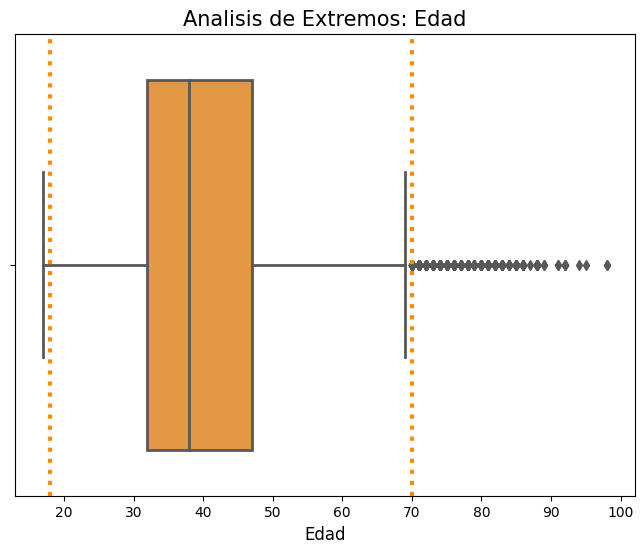

In [105]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(x=df.age,palette="YlOrBr",linewidth=2)

#Limite de edad inferior
limite_edadInferior=18
plt.axvline(limite_edadInferior, color='darkorange', linestyle='dotted', linewidth=3, label='limite edad')

# Establece limite de edad de 70 años
limite_edadSuperior=70
plt.axvline(limite_edadSuperior, color='darkorange', linestyle='dotted', linewidth=3, label='limite edad')

plt.title('Analisis de Extremos: Edad', fontsize=15)
plt.xlabel('Edad',fontsize=12)
plt.show()

In [106]:
# Listado con casos con menos de 18 años
df.loc[df['age']<18,:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,GrupoEdad
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no,Menor a 18
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no,Menor a 18
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no,Menor a 18
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes,Menor a 18
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes,Menor a 18


In [109]:
# Listado con casos con más e 70 años
df.loc[df['age']>70,:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,GrupoEdad
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,no,56+
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,no,56+
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,no,56+
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,56+
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,56+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,no,56+
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,yes,56+
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,yes,56+
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,56+


In [107]:
# Porcentaje de casos con menos de 18 años

porc_menor18=100*(len(df[df.age<18])/len(df))

print('% Casos menor a 18: {0:.2f}'.format(porc_menor18),"%")

# Porcentaje de casos con más de 70 años

porc_may70=100*(len(df[df.age>70])/len(df))

print('% Casos mayor a 70: {0:.2f}'.format(porc_may70),"%")


% Casos menor a 18: 0.01 %
% Casos mayor a 70: 1.02 %


In [108]:
# Creación de Grupos de Edad

def grupo_edad(x):

  if x<18:
    return "Menor a 18"  
  elif x>=18 and x<=24:
    return "18-24"
  elif x>=25 and x<=39:
    return "25-39"
  elif x>=40 and x<=55:
    return "40-55"
  elif x>=56:
    return "56+"
  else:
    return "Otro caso"

df.loc[:,['GrupoEdad']] = df.age.apply(lambda x: grupo_edad(x))

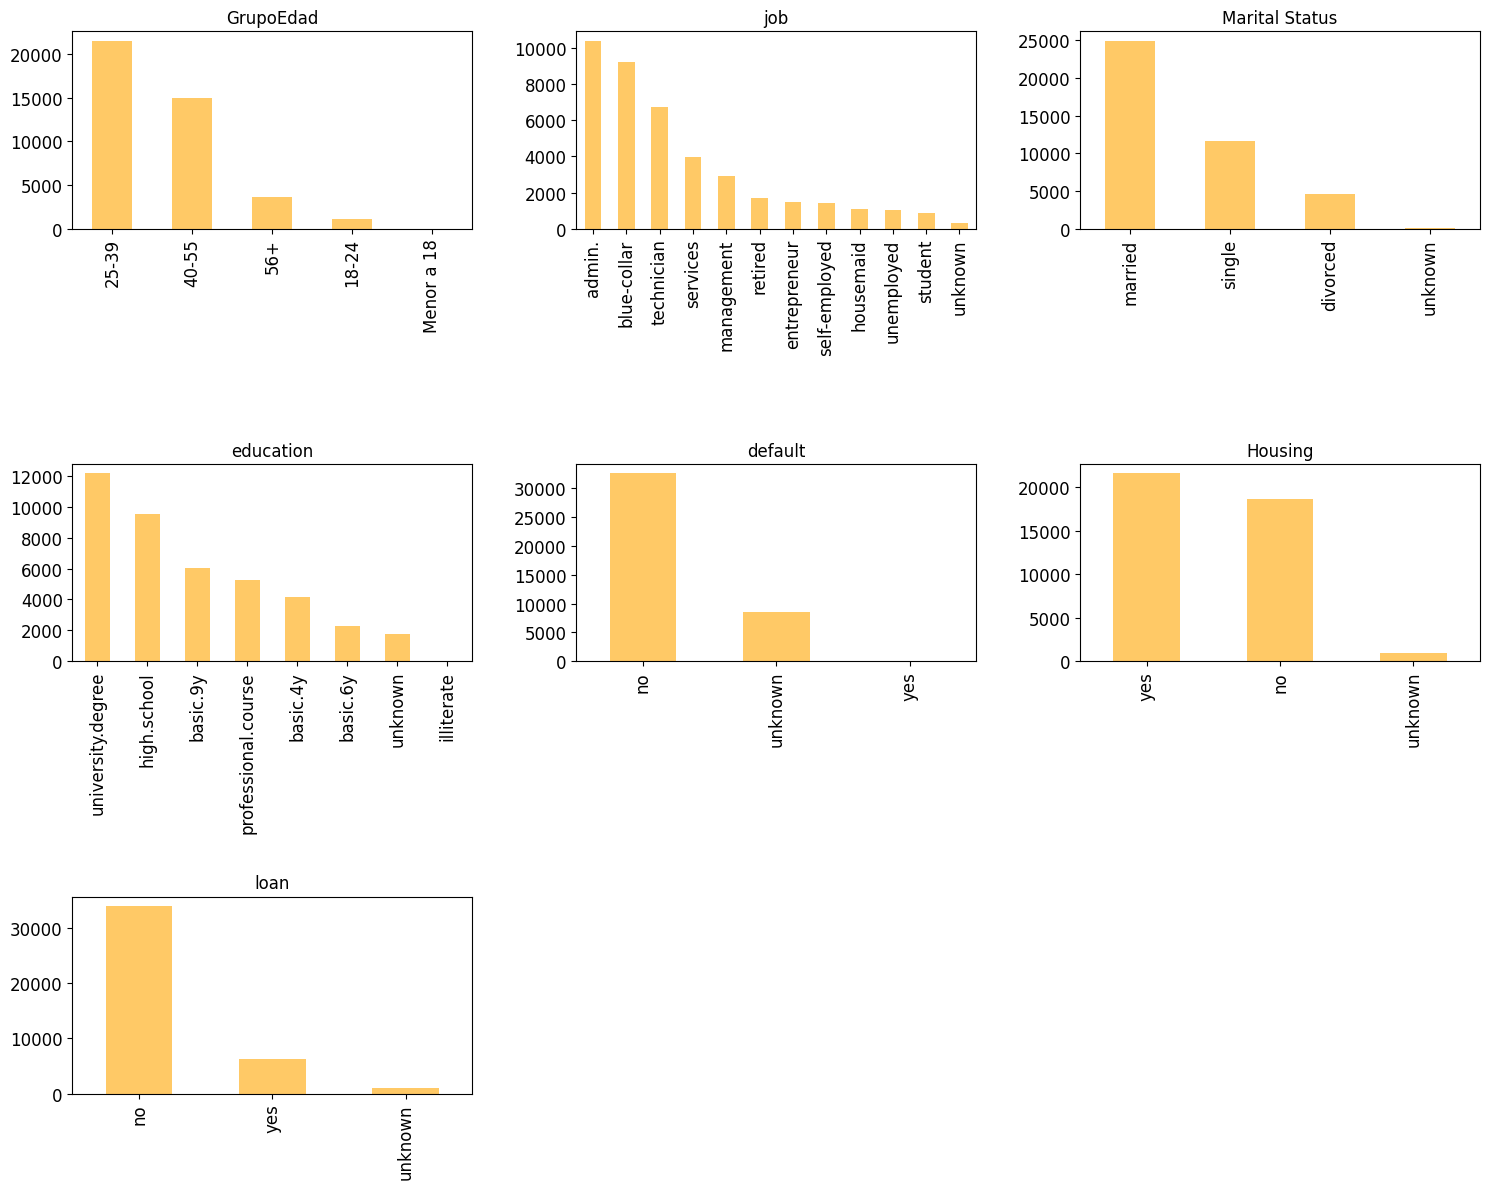

In [98]:

plt.subplots(figsize=(15, 12))
plt.subplot(3,3,1)
ax1=df.GrupoEdad.value_counts().plot(kind='bar', title='GrupoEdad',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,2)
ax2=df.job.value_counts().plot(kind='bar', title='job',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,3)
ax3=df.marital.value_counts().plot(kind='bar', title='Marital Status',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,4)
ax4=df.education.value_counts().plot(kind='bar', title='education',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,5)
ax5=df.default.value_counts().plot(kind='bar', title='default',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,6)
ax6=df.housing.value_counts().plot(kind='bar', title='Housing',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(3,3,7)
ax7=df.loan.value_counts().plot(kind='bar', title='loan',color ='orange',width = 0.5,alpha=0.6,fontsize=12)
plt.tight_layout(w_pad=3,h_pad=3)
plt.show()

### 2. Relacionado con el último contacto de la campaña actual:

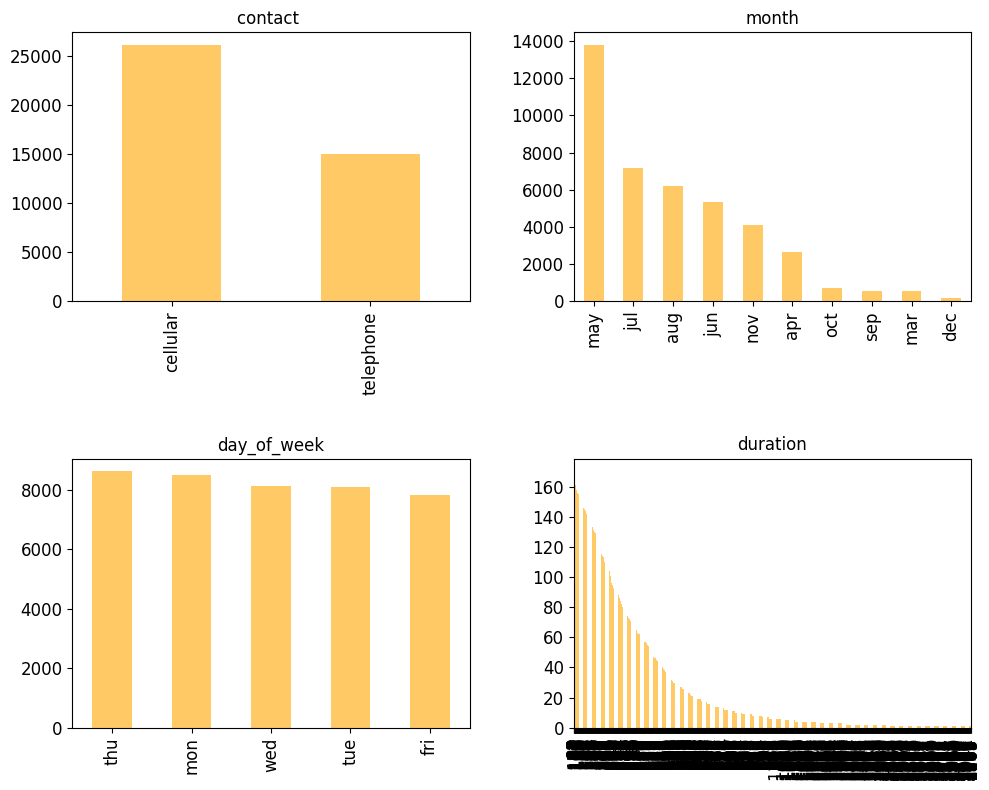

In [101]:

plt.subplots(figsize=(10, 8))
plt.subplot(2,2,1)
ax1=df.contact .value_counts().plot(kind='bar', title='contact ',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,2)
ax2=df.month.value_counts().plot(kind='bar', title='month',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,3)
ax3=df.day_of_week.value_counts().plot(kind='bar', title='day_of_week',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,4)
ax4=df.duration.value_counts().plot(kind='bar', title='duration',color ='orange',width = 0.5,alpha=0.6,fontsize=12)
plt.tight_layout(w_pad=3,h_pad=3)
plt.show()

## 3. Contacto

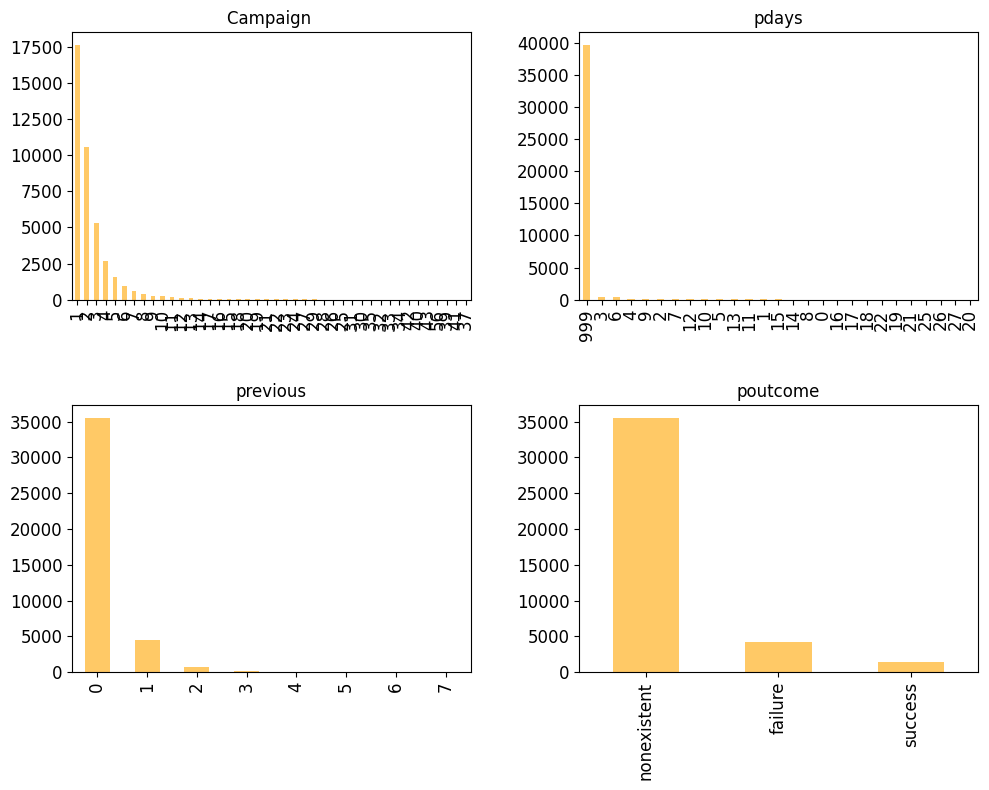

In [103]:
plt.subplots(figsize=(10, 8))
plt.subplot(2,2,1)
ax1=df.campaign .value_counts().plot(kind='bar', title='Campaign ',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,2)
ax2=df.pdays.value_counts().plot(kind='bar', title='pdays',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,3)
ax3=df.previous.value_counts().plot(kind='bar', title='previous',color ='orange',width = 0.5,alpha=0.6,fontsize=12)

plt.subplot(2,2,4)
ax4=df.poutcome.value_counts().plot(kind='bar', title='poutcome',color ='orange',width = 0.5,alpha=0.6,fontsize=12)
plt.tight_layout(w_pad=3,h_pad=3)
plt.show()

## 4. Atributos del Contexto Social y Economico

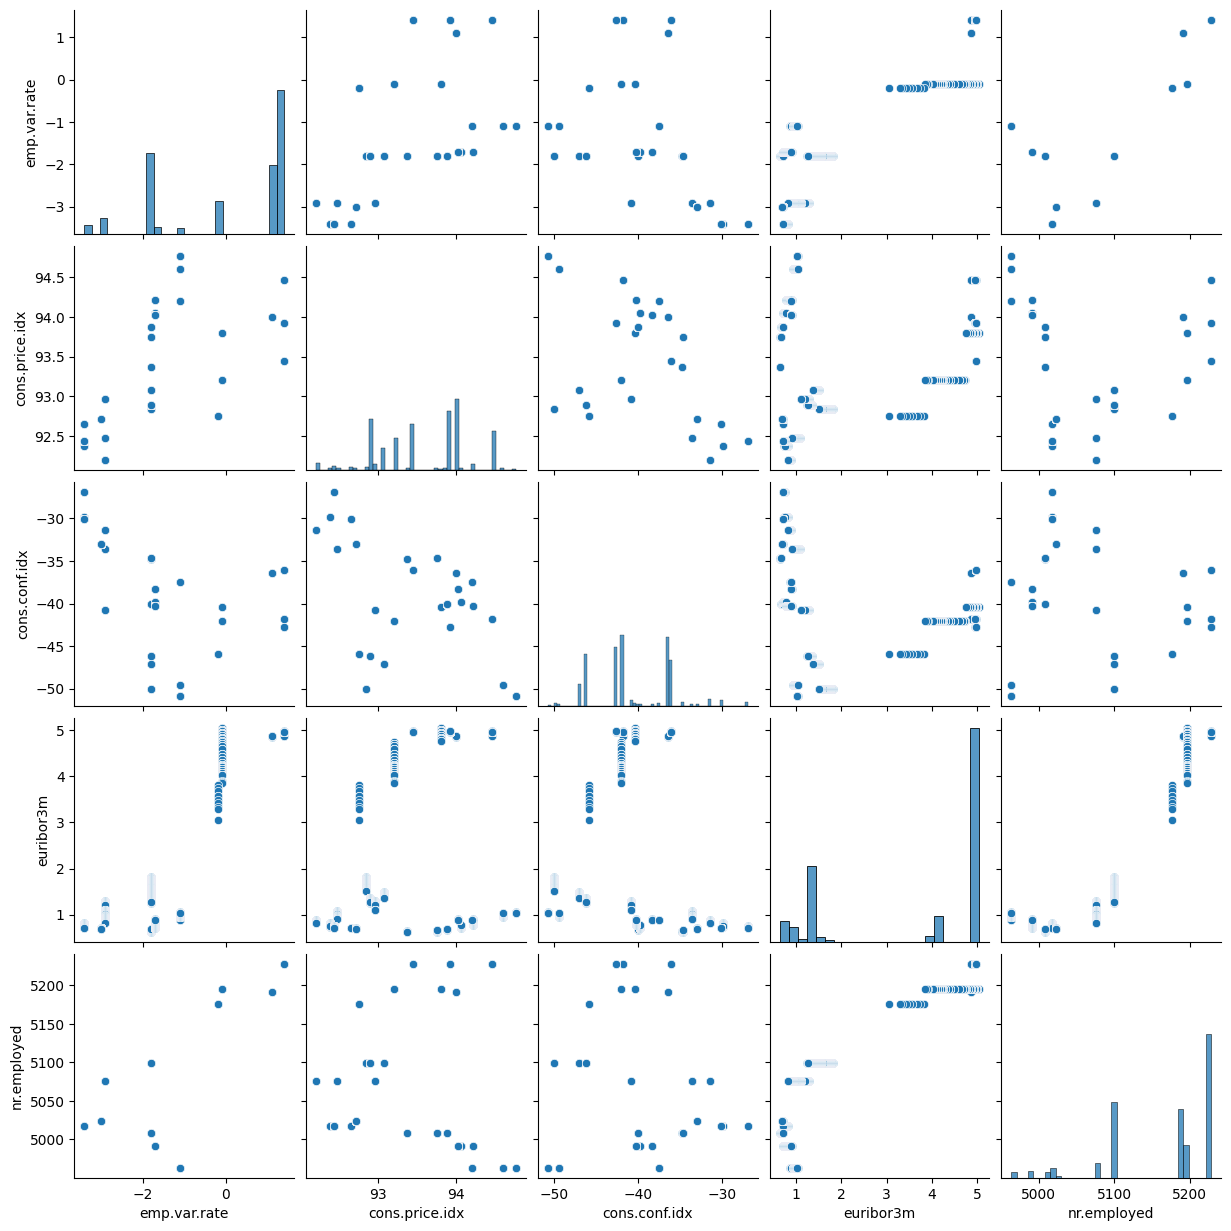

In [113]:
sns.pairplot(df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']], diag_kind='hist')

### 5. Variable de salida (objetivo)

<p> Target= 1, El cliente ha suscrito un depósito a plazo.
<p> Target= 0 en caso contrario.

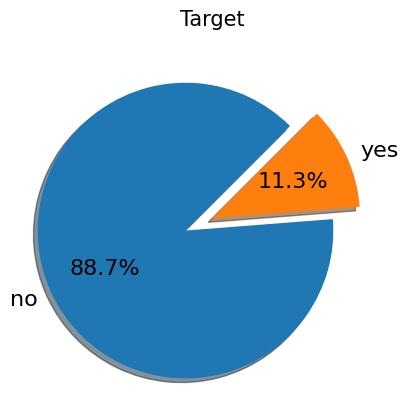

In [104]:
valores = df['y'].value_counts()

explode = (0.2, 0)

plt.pie(valores, labels=valores.index,explode=explode ,autopct='%1.1f%%', shadow=True, startangle=45, textprops = {'color': 'black','fontsize':16},)

plt.title('Target', fontsize='15')

plt.show()